<a href="https://colab.research.google.com/github/megmkoch/IceJamProjectFall2022/blob/main/2019_2020_IceJamProjectFall22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
!pip install geopandas
!pip install libpysal
!pip install rasterio
!pip install earthpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
import numpy as np
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import rasterio as rio
from rasterio.plot import plotting_extent
import earthpy as et
import earthpy.plot as ep

In [17]:
import urllib.request

#define online filepath (aka url)
#Dec04-Dec16
dec162019_url = 'https://d3gm2hf49xd6jj.cloudfront.net/cf19619e-2508-4aca-8855-a4af0c9092ec/S1AA_20191204T225135_20191216T225135_VVP012_INT80_G_ueF_813B.zip'

#define local filepath
dec162019_filepath = 'S1AA_20191204T225135_20191216T225135_VVP012_INT80_G_ueF_813B.zip'

#download data
urllib.request.urlretrieve(dec162019_url, dec162019_filepath)

#unzip file 
!unzip S1AA_20191204T225135_20191216T225135_VVP012_INT80_G_ueF_813B.zip



Archive:  S1AA_20191204T225135_20191216T225135_VVP012_INT80_G_ueF_813B.zip
replace S1AA_20191204T225135_20191216T225135_VVP012_INT80_G_ueF_813B/S1AA_20191204T225135_20191216T225135_VVP012_INT80_G_ueF_813B_color_phase.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace S1AA_20191204T225135_20191216T225135_VVP012_INT80_G_ueF_813B/S1AA_20191204T225135_20191216T225135_VVP012_INT80_G_ueF_813B_color_phase.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: S1AA_20191204T225135_20191216T225135_VVP012_INT80_G_ueF_813B/S1AA_20191204T225135_20191216T225135_VVP012_INT80_G_ueF_813B_color_phase.png  
  inflating: S1AA_20191204T225135_20191216T225135_VVP012_INT80_G_ueF_813B/S1AA_20191204T225135_20191216T225135_VVP012_INT80_G_ueF_813B_unw_phase.png  
  inflating: S1AA_20191204T225135_20191216T225135_VVP012_INT80_G_ueF_813B/S1AA_20191204T225135_20191216T225135_VVP012_INT80_G_ueF_813B_dem.tif.xml  
  inflating: S1AA_20191204T225135_20191216T225135_VVP012_INT80_G_ueF_

In [18]:
# open and plot vertical displacement map
with rio.open('S1AA_20191204T225135_20191216T225135_VVP012_INT80_G_ueF_813B/S1AA_20191204T225135_20191216T225135_VVP012_INT80_G_ueF_813B_vert_disp.tif') as vert_disp_src:
    dec162019 = vert_disp_src.read(1)


In [19]:
type(dec162019)


numpy.ndarray

In [20]:
dec162019.shape

(2941, 3639)

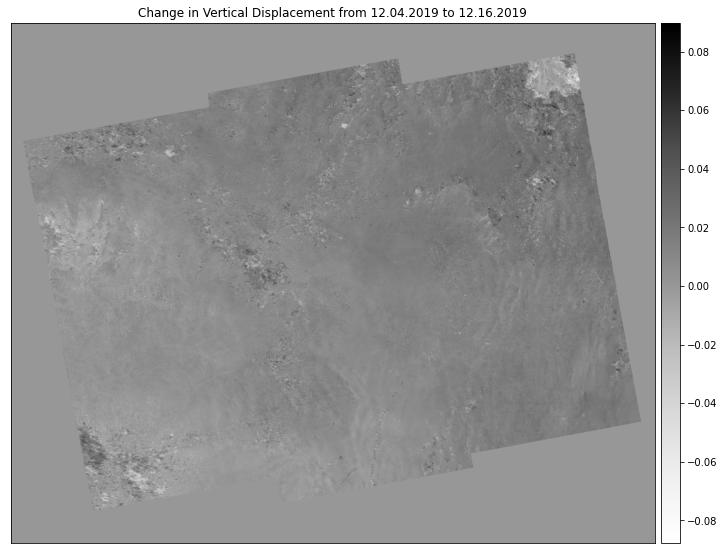

In [21]:
# plot vertical displacement using earthpy
ep.plot_bands(dec162019,
              title="Change in Vertical Displacement from 12.04.2019 to 12.16.2019",
              cmap="Greys")

plt.show()

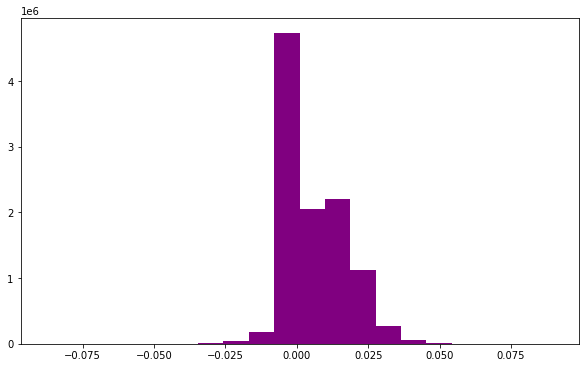

In [22]:
ep.hist(dec162019,
        figsize=(10, 6))
plt.show()

In [23]:
with rio.open('S1AA_20191204T225135_20191216T225135_VVP012_INT80_G_ueF_813B/S1AA_20191204T225135_20191216T225135_VVP012_INT80_G_ueF_813B_vert_disp.tif') as vert_disp_src:
    # Create an object called feb142020_meta that contains the spatial metadata
    dec162019_meta = vert_disp_src.profile

dec162019_meta

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': 0.0, 'width': 3639, 'height': 2941, 'count': 1, 'crs': CRS.from_epsg(32618), 'transform': Affine(80.0, 0.0, 423240.0,
       0.0, -80.0, 4845720.0), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}

In [24]:
#open and plot coherence map
with rio.open('S1AA_20191204T225135_20191216T225135_VVP012_INT80_G_ueF_813B/S1AA_20191204T225135_20191216T225135_VVP012_INT80_G_ueF_813B_corr.tif') as coherence_src:
    dec162019_corr = coherence_src.read(1)

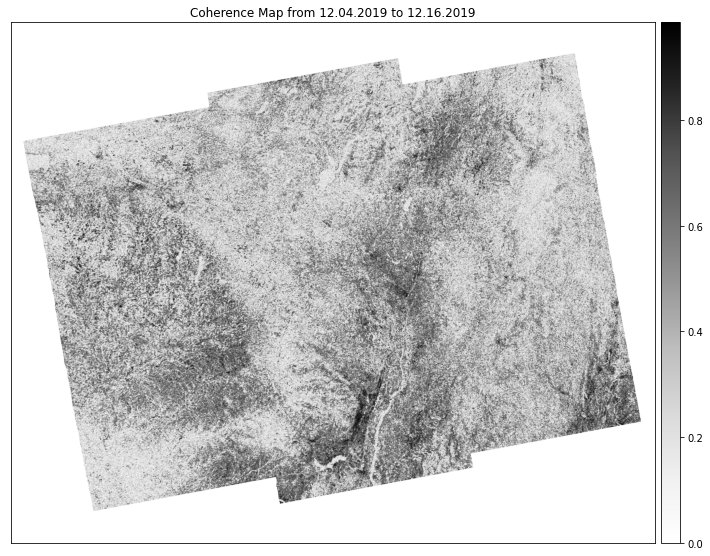

In [25]:
ep.plot_bands(dec162019_corr,
              title="Coherence Map from 12.04.2019 to 12.16.2019",
              cmap="Greys")

plt.show()

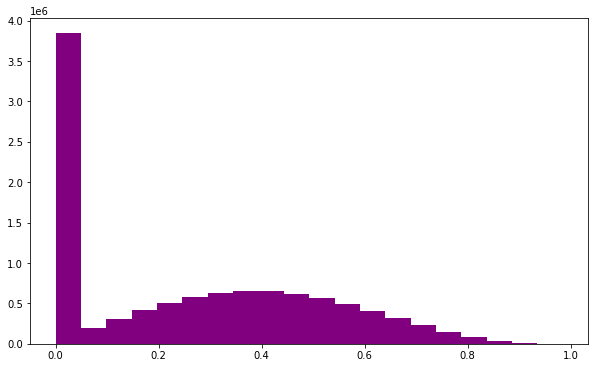

In [26]:
ep.hist(dec162019_corr,
        figsize=(10, 6))
plt.show()

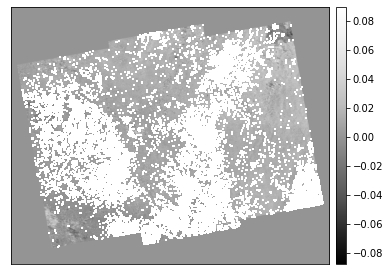

In [38]:
# masking the vertical displacement array (dec162019) by using coherence array (dec162019_corr) where condition coherence array >0.8 is true
dec162019_mask = np.ma.masked_where(dec162019_corr > 0.8, dec162019)
  
# plot vertical displacement array masked by coherence
fig, ax = plt.subplots(figsize=(6,6))
ep.plot_bands(dec162019_mask,
               ax=ax,
               scale=False)
plt.show()

In [28]:
#define online filepath (aka url)
#Dec16-Dec28
dec282019_url = 'https://d3gm2hf49xd6jj.cloudfront.net/0ca05be3-fdf8-4351-8fe8-30b539b81c8d/S1AA_20191216T225135_20191228T225134_VVP012_INT80_G_ueF_A075.zip'

#define local filepath
dec282019_filepath = 'S1AA_20191216T225135_20191228T225134_VVP012_INT80_G_ueF_A075.zip'

#download data
urllib.request.urlretrieve(dec282019_url, dec282019_filepath)

#unzip file 
!unzip S1AA_20191216T225135_20191228T225134_VVP012_INT80_G_ueF_A075.zip

Archive:  S1AA_20191216T225135_20191228T225134_VVP012_INT80_G_ueF_A075.zip
   creating: S1AA_20191216T225135_20191228T225134_VVP012_INT80_G_ueF_A075/
  inflating: S1AA_20191216T225135_20191228T225134_VVP012_INT80_G_ueF_A075/S1AA_20191216T225135_20191228T225134_VVP012_INT80_G_ueF_A075.README.md.txt  
  inflating: S1AA_20191216T225135_20191228T225134_VVP012_INT80_G_ueF_A075/S1AA_20191216T225135_20191228T225134_VVP012_INT80_G_ueF_A075_unw_phase.kmz  
  inflating: S1AA_20191216T225135_20191228T225134_VVP012_INT80_G_ueF_A075/S1AA_20191216T225135_20191228T225134_VVP012_INT80_G_ueF_A075_water_mask.tif.xml  
  inflating: S1AA_20191216T225135_20191228T225134_VVP012_INT80_G_ueF_A075/S1AA_20191216T225135_20191228T225134_VVP012_INT80_G_ueF_A075_unw_phase.tif.xml  
  inflating: S1AA_20191216T225135_20191228T225134_VVP012_INT80_G_ueF_A075/S1AA_20191216T225135_20191228T225134_VVP012_INT80_G_ueF_A075_unw_phase.png.xml  
  inflating: S1AA_20191216T225135_20191228T225134_VVP012_INT80_G_ueF_A075/S1AA_201

In [30]:
# open and plot vertical displacement map
with rio.open('S1AA_20191216T225135_20191228T225134_VVP012_INT80_G_ueF_A075/S1AA_20191216T225135_20191228T225134_VVP012_INT80_G_ueF_A075_vert_disp.tif') as vert_disp_src:
    dec282019 = vert_disp_src.read(1)

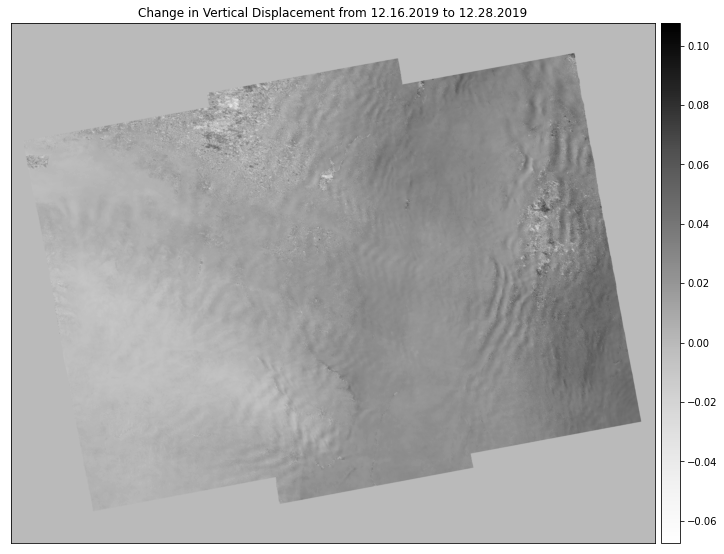

In [31]:
ep.plot_bands(dec282019,
              title="Change in Vertical Displacement from 12.16.2019 to 12.28.2019",
              cmap="Greys")

plt.show()

In [32]:
with rio.open('S1AA_20191216T225135_20191228T225134_VVP012_INT80_G_ueF_A075/S1AA_20191216T225135_20191228T225134_VVP012_INT80_G_ueF_A075_corr.tif') as coherence_src:
    dec282019_corr = coherence_src.read(1)

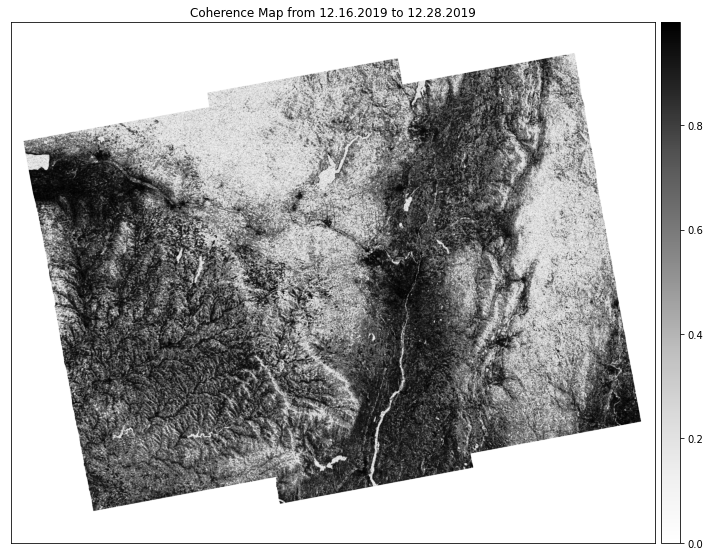

In [34]:
ep.plot_bands(dec282019_corr,
              title="Coherence Map from 12.16.2019 to 12.28.2019",
              cmap="Greys")

plt.show()

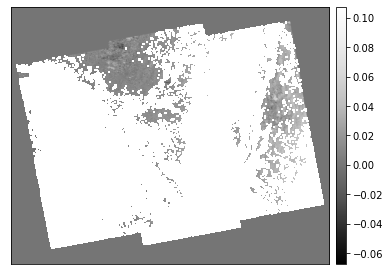

In [39]:
# masking the vertical displacement array (dec282019) by using coherence array (dec282019_corr) where condition coherence array >0.8 is true
dec282019_mask = np.ma.masked_where(dec282019_corr > 0.8, dec282019)
  
# plot vertical displacement array masked by coherence
fig, ax = plt.subplots(figsize=(6,6))
ep.plot_bands(dec282019_mask,
               ax=ax,
               scale=False)
plt.show()

In [40]:
#define online filepath (aka url)
#Dec28-Jan09
jan092020_url = 'https://d3gm2hf49xd6jj.cloudfront.net/987041f9-a059-4086-af22-0218cbcacd1c/S1AA_20191228T225134_20200109T225134_VVP012_INT80_G_ueF_4B2F.zip'

#define local filepath
jan092020_filepath = 'S1AA_20191228T225134_20200109T225134_VVP012_INT80_G_ueF_4B2F.zip'

#download data
urllib.request.urlretrieve(jan092020_url, jan092020_filepath)

#unzip file 
!unzip S1AA_20191228T225134_20200109T225134_VVP012_INT80_G_ueF_4B2F.zip

Archive:  S1AA_20191228T225134_20200109T225134_VVP012_INT80_G_ueF_4B2F.zip
   creating: S1AA_20191228T225134_20200109T225134_VVP012_INT80_G_ueF_4B2F/
  inflating: S1AA_20191228T225134_20200109T225134_VVP012_INT80_G_ueF_4B2F/S1AA_20191228T225134_20200109T225134_VVP012_INT80_G_ueF_4B2F_vert_disp.tif.xml  
  inflating: S1AA_20191228T225134_20200109T225134_VVP012_INT80_G_ueF_4B2F/S1AA_20191228T225134_20200109T225134_VVP012_INT80_G_ueF_4B2F_wrapped_phase.tif.xml  
  inflating: S1AA_20191228T225134_20200109T225134_VVP012_INT80_G_ueF_4B2F/S1AA_20191228T225134_20200109T225134_VVP012_INT80_G_ueF_4B2F_color_phase.png  
  inflating: S1AA_20191228T225134_20200109T225134_VVP012_INT80_G_ueF_4B2F/S1AA_20191228T225134_20200109T225134_VVP012_INT80_G_ueF_4B2F_unw_phase.tif.xml  
  inflating: S1AA_20191228T225134_20200109T225134_VVP012_INT80_G_ueF_4B2F/S1AA_20191228T225134_20200109T225134_VVP012_INT80_G_ueF_4B2F_color_phase.png.xml  
  inflating: S1AA_20191228T225134_20200109T225134_VVP012_INT80_G_ueF_4B

In [41]:
# open and plot vertical displacement map
with rio.open('S1AA_20191228T225134_20200109T225134_VVP012_INT80_G_ueF_4B2F/S1AA_20191228T225134_20200109T225134_VVP012_INT80_G_ueF_4B2F_vert_disp.tif') as vert_disp_src:
    jan092020 = vert_disp_src.read(1)

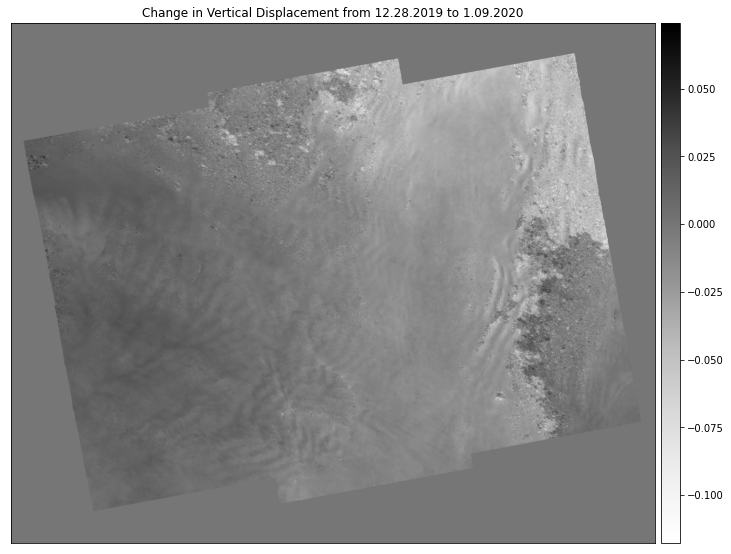

In [42]:
ep.plot_bands(jan092020,
              title="Change in Vertical Displacement from 12.28.2019 to 1.09.2020",
              cmap="Greys")

plt.show()

In [43]:
with rio.open('S1AA_20191228T225134_20200109T225134_VVP012_INT80_G_ueF_4B2F/S1AA_20191228T225134_20200109T225134_VVP012_INT80_G_ueF_4B2F_corr.tif') as coherence_src:
    jan092020_corr = coherence_src.read(1)

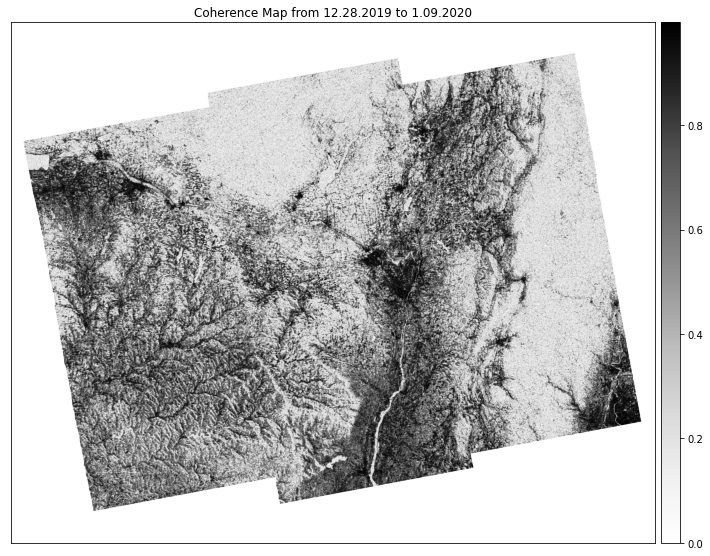

In [44]:
ep.plot_bands(jan092020_corr,
              title="Coherence Map from 12.28.2019 to 1.09.2020",
              cmap="Greys")

plt.show()

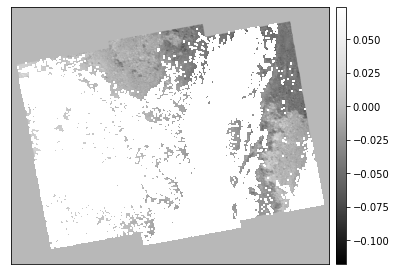

In [45]:
# masking the vertical displacement array (jan092020) by using coherence array (jan092020_corr) where condition coherence array >0.8 is true
jan092020_mask = np.ma.masked_where(jan092020_corr > 0.8, jan092020)
  
# plot vertical displacement array masked by coherence
fig, ax = plt.subplots(figsize=(6,6))
ep.plot_bands(jan092020_mask,
               ax=ax,
               scale=False)
plt.show()

In [46]:
#define online filepath (aka url)
#Jan09-Jan21
jan212020_url = 'https://d3gm2hf49xd6jj.cloudfront.net/966ad146-fa26-4ed7-9491-e2e9507f41ab/S1AA_20200109T225134_20200121T225133_VVP012_INT80_G_ueF_AFD7.zip'

#define local filepath
jan212020_filepath = 'S1AA_20200109T225134_20200121T225133_VVP012_INT80_G_ueF_AFD7.zip'

#download data
urllib.request.urlretrieve(jan212020_url, jan212020_filepath)

#unzip file 
!unzip S1AA_20200109T225134_20200121T225133_VVP012_INT80_G_ueF_AFD7.zip
  

Archive:  S1AA_20200109T225134_20200121T225133_VVP012_INT80_G_ueF_AFD7.zip
   creating: S1AA_20200109T225134_20200121T225133_VVP012_INT80_G_ueF_AFD7/
  inflating: S1AA_20200109T225134_20200121T225133_VVP012_INT80_G_ueF_AFD7/S1AA_20200109T225134_20200121T225133_VVP012_INT80_G_ueF_AFD7_unw_phase.tif.xml  
  inflating: S1AA_20200109T225134_20200121T225133_VVP012_INT80_G_ueF_AFD7/S1AA_20200109T225134_20200121T225133_VVP012_INT80_G_ueF_AFD7.txt  
  inflating: S1AA_20200109T225134_20200121T225133_VVP012_INT80_G_ueF_AFD7/S1AA_20200109T225134_20200121T225133_VVP012_INT80_G_ueF_AFD7_amp.tif.xml  
  inflating: S1AA_20200109T225134_20200121T225133_VVP012_INT80_G_ueF_AFD7/S1AA_20200109T225134_20200121T225133_VVP012_INT80_G_ueF_AFD7_color_phase.kmz  
  inflating: S1AA_20200109T225134_20200121T225133_VVP012_INT80_G_ueF_AFD7/S1AA_20200109T225134_20200121T225133_VVP012_INT80_G_ueF_AFD7_color_phase.png.xml  
  inflating: S1AA_20200109T225134_20200121T225133_VVP012_INT80_G_ueF_AFD7/S1AA_20200109T225134_

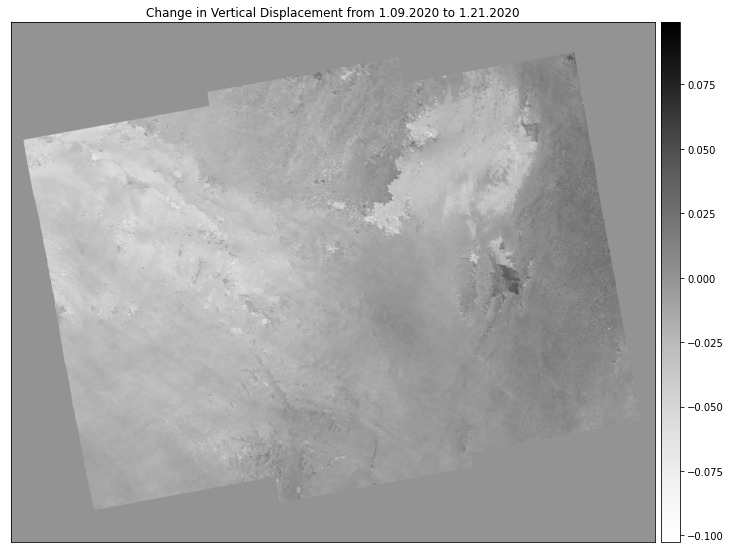

In [47]:
# open and plot vertical displacement map
with rio.open('S1AA_20200109T225134_20200121T225133_VVP012_INT80_G_ueF_AFD7/S1AA_20200109T225134_20200121T225133_VVP012_INT80_G_ueF_AFD7_vert_disp.tif') as vert_disp_src:
    jan212020 = vert_disp_src.read(1)

ep.plot_bands(jan212020,
              title="Change in Vertical Displacement from 1.09.2020 to 1.21.2020",
              cmap="Greys")

plt.show()

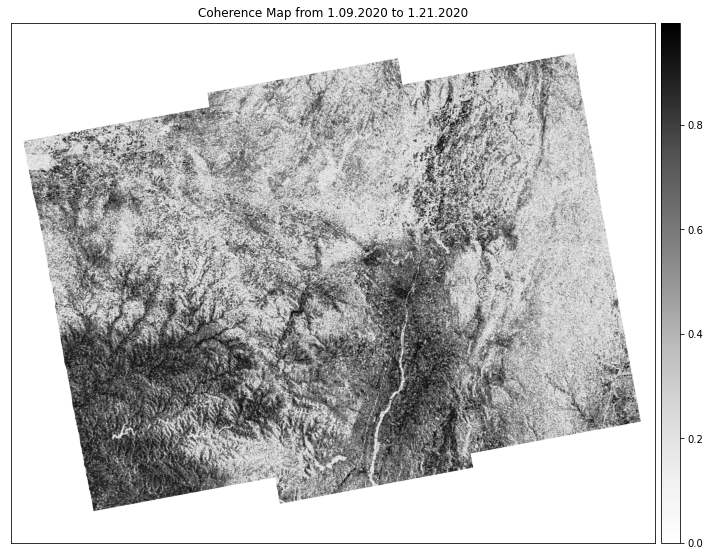

In [48]:
with rio.open('S1AA_20200109T225134_20200121T225133_VVP012_INT80_G_ueF_AFD7/S1AA_20200109T225134_20200121T225133_VVP012_INT80_G_ueF_AFD7_corr.tif') as coherence_src:
    jan212020_corr = coherence_src.read(1)

ep.plot_bands(jan212020_corr,
              title="Coherence Map from 1.09.2020 to 1.21.2020",
              cmap="Greys")

plt.show()

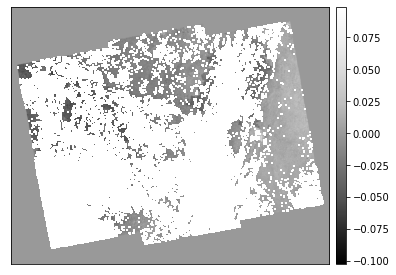

In [49]:
# masking the vertical displacement array (jan212020) by using coherence array (jan212020_corr) where condition coherence array >0.8 is true
jan212020_mask = np.ma.masked_where(jan212020_corr > 0.8, jan212020)
  
# plot vertical displacement array masked by coherence
fig, ax = plt.subplots(figsize=(6,6))
ep.plot_bands(jan212020_mask,
               ax=ax,
               scale=False)
plt.show()

In [50]:
#define online filepath (aka url)
#Jan21-Feb02
feb022020_url = 'https://d3gm2hf49xd6jj.cloudfront.net/aae02d14-926f-4394-ad81-12904a884c15/S1AA_20200121T225133_20200202T225133_VVP012_INT80_G_ueF_9C76.zip'

#define local filepath
feb022020_filepath = 'S1AA_20200121T225133_20200202T225133_VVP012_INT80_G_ueF_9C76.zip'

#download data
urllib.request.urlretrieve(feb022020_url, feb022020_filepath)

#unzip file 
!unzip S1AA_20200121T225133_20200202T225133_VVP012_INT80_G_ueF_9C76.zip


Archive:  S1AA_20200121T225133_20200202T225133_VVP012_INT80_G_ueF_9C76.zip
   creating: S1AA_20200121T225133_20200202T225133_VVP012_INT80_G_ueF_9C76/
  inflating: S1AA_20200121T225133_20200202T225133_VVP012_INT80_G_ueF_9C76/S1AA_20200121T225133_20200202T225133_VVP012_INT80_G_ueF_9C76_wrapped_phase.tif  
  inflating: S1AA_20200121T225133_20200202T225133_VVP012_INT80_G_ueF_9C76/S1AA_20200121T225133_20200202T225133_VVP012_INT80_G_ueF_9C76_unw_phase.kmz  
  inflating: S1AA_20200121T225133_20200202T225133_VVP012_INT80_G_ueF_9C76/S1AA_20200121T225133_20200202T225133_VVP012_INT80_G_ueF_9C76_vert_disp.tif.xml  
  inflating: S1AA_20200121T225133_20200202T225133_VVP012_INT80_G_ueF_9C76/S1AA_20200121T225133_20200202T225133_VVP012_INT80_G_ueF_9C76_corr.tif.xml  
  inflating: S1AA_20200121T225133_20200202T225133_VVP012_INT80_G_ueF_9C76/S1AA_20200121T225133_20200202T225133_VVP012_INT80_G_ueF_9C76_los_disp.tif.xml  
  inflating: S1AA_20200121T225133_20200202T225133_VVP012_INT80_G_ueF_9C76/S1AA_202001

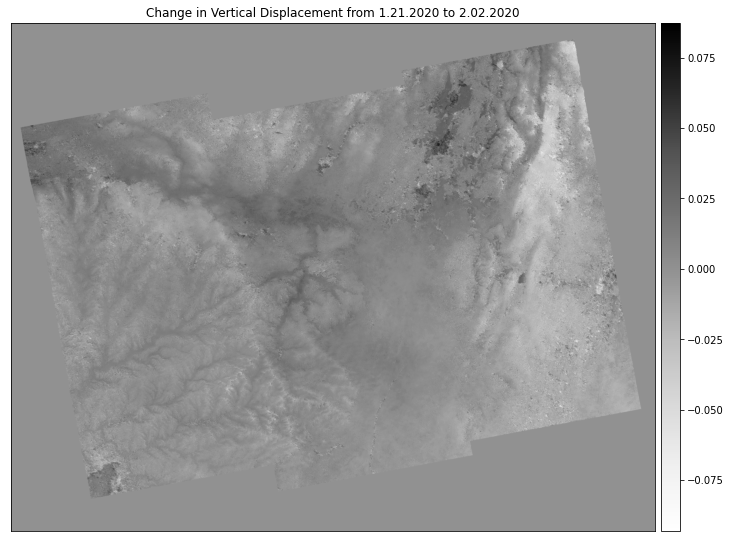

In [51]:
# open and plot vertical displacement map
with rio.open('S1AA_20200121T225133_20200202T225133_VVP012_INT80_G_ueF_9C76/S1AA_20200121T225133_20200202T225133_VVP012_INT80_G_ueF_9C76_vert_disp.tif') as vert_disp_src:
    feb022020 = vert_disp_src.read(1)

ep.plot_bands(feb022020,
              title="Change in Vertical Displacement from 1.21.2020 to 2.02.2020",
              cmap="Greys")

plt.show()

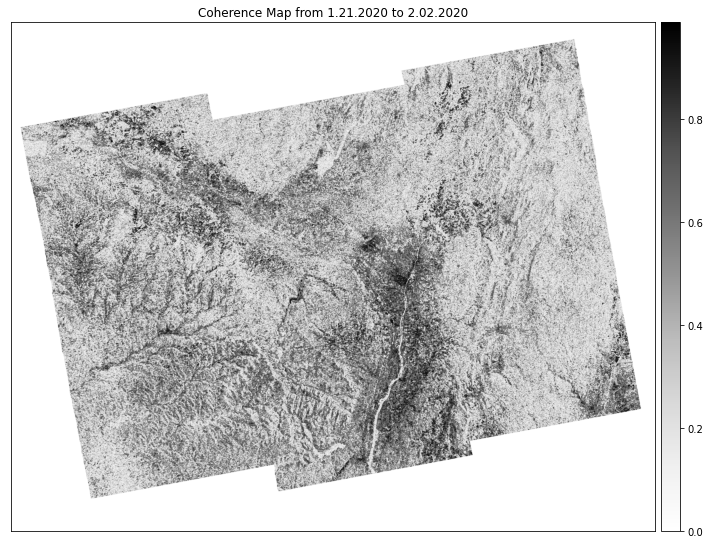

In [52]:
with rio.open('S1AA_20200121T225133_20200202T225133_VVP012_INT80_G_ueF_9C76/S1AA_20200121T225133_20200202T225133_VVP012_INT80_G_ueF_9C76_corr.tif') as coherence_src:
    feb022020_corr = coherence_src.read(1)

ep.plot_bands(feb022020_corr,
              title="Coherence Map from 1.21.2020 to 2.02.2020",
              cmap="Greys")

plt.show()

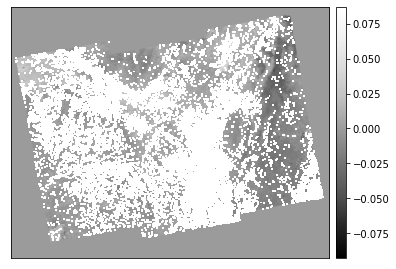

In [53]:
# masking the vertical displacement array (feb022020) by using coherence array (feb022020_corr) where condition coherence array >0.8 is true
feb022020_mask = np.ma.masked_where(feb022020_corr > 0.8, feb022020)
  
# plot vertical displacement array masked by coherence
fig, ax = plt.subplots(figsize=(6,6))
ep.plot_bands(feb022020_mask,
               ax=ax,
               scale=False)
plt.show()

In [55]:
#define online filepath (aka url)
#Feb02-Feb14
feb142020_url = 'https://d3gm2hf49xd6jj.cloudfront.net/a3830581-0cd9-47f0-8834-679f06cf5032/S1AA_20200202T225133_20200214T225132_VVP012_INT80_G_ueF_2C56.zip'

#define local filepath
feb142020_filepath = 'S1AA_20200202T225133_20200214T225132_VVP012_INT80_G_ueF_2C56.zip'

#download data
urllib.request.urlretrieve(feb142020_url, feb142020_filepath)

#unzip file 
!unzip S1AA_20200202T225133_20200214T225132_VVP012_INT80_G_ueF_2C56.zip

Archive:  S1AA_20200202T225133_20200214T225132_VVP012_INT80_G_ueF_2C56.zip
   creating: S1AA_20200202T225133_20200214T225132_VVP012_INT80_G_ueF_2C56/
  inflating: S1AA_20200202T225133_20200214T225132_VVP012_INT80_G_ueF_2C56/S1AA_20200202T225133_20200214T225132_VVP012_INT80_G_ueF_2C56_color_phase.png.aux.xml  
  inflating: S1AA_20200202T225133_20200214T225132_VVP012_INT80_G_ueF_2C56/S1AA_20200202T225133_20200214T225132_VVP012_INT80_G_ueF_2C56_corr.tif  
  inflating: S1AA_20200202T225133_20200214T225132_VVP012_INT80_G_ueF_2C56/S1AA_20200202T225133_20200214T225132_VVP012_INT80_G_ueF_2C56_dem.tif.xml  
  inflating: S1AA_20200202T225133_20200214T225132_VVP012_INT80_G_ueF_2C56/S1AA_20200202T225133_20200214T225132_VVP012_INT80_G_ueF_2C56_los_disp.tif  
  inflating: S1AA_20200202T225133_20200214T225132_VVP012_INT80_G_ueF_2C56/S1AA_20200202T225133_20200214T225132_VVP012_INT80_G_ueF_2C56_los_disp.tif.xml  
  inflating: S1AA_20200202T225133_20200214T225132_VVP012_INT80_G_ueF_2C56/S1AA_20200202T22

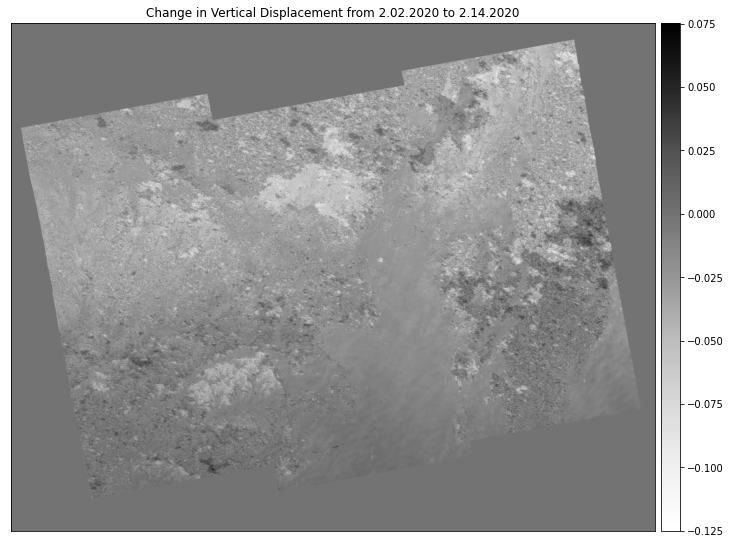

In [56]:
# open and plot vertical displacement map
with rio.open('S1AA_20200202T225133_20200214T225132_VVP012_INT80_G_ueF_2C56/S1AA_20200202T225133_20200214T225132_VVP012_INT80_G_ueF_2C56_vert_disp.tif') as vert_disp_src:
    feb142020 = vert_disp_src.read(1)

ep.plot_bands(feb142020,
              title="Change in Vertical Displacement from 2.02.2020 to 2.14.2020",
              cmap="Greys")

plt.show()

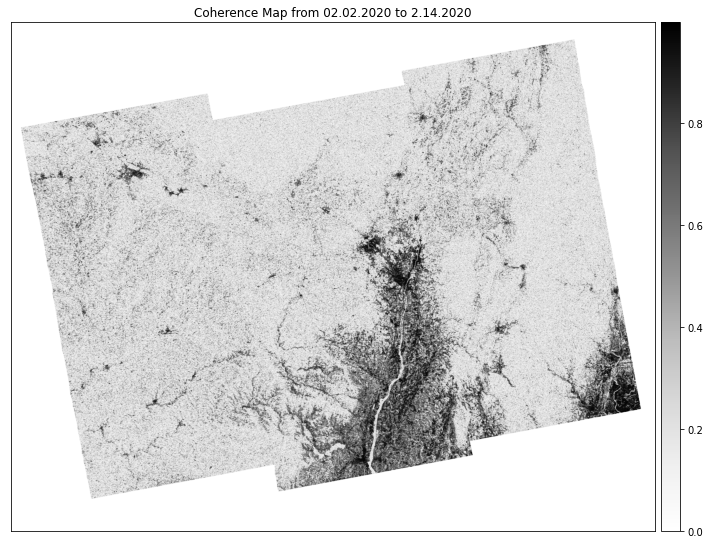

In [57]:
with rio.open('S1AA_20200202T225133_20200214T225132_VVP012_INT80_G_ueF_2C56/S1AA_20200202T225133_20200214T225132_VVP012_INT80_G_ueF_2C56_corr.tif') as coherence_src:
    feb142020_corr = coherence_src.read(1)

ep.plot_bands(feb142020_corr,
              title="Coherence Map from 02.02.2020 to 2.14.2020",
              cmap="Greys")

plt.show()

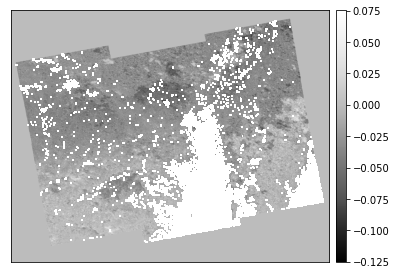

In [58]:
# masking the vertical displacement array (feb142020) by using coherence array (feb142020_corr) where condition coherence array >0.8 is true
feb142020_mask = np.ma.masked_where(feb142020_corr > 0.8, feb142020)
  
# plot vertical displacement array masked by coherence
fig, ax = plt.subplots(figsize=(6,6))
ep.plot_bands(feb142020_mask,
               ax=ax,
               scale=False)
plt.show()

In [59]:
#define online filepath (aka url)
#Feb14-Feb26
feb262020_url = 'https://d3gm2hf49xd6jj.cloudfront.net/47347fc5-4662-40a5-bb1e-dd517ced1e0c/S1AA_20200214T225132_20200226T225132_VVP012_INT80_G_ueF_1BFC.zip'

#define local filepath
feb262020_filepath = 'S1AA_20200214T225132_20200226T225132_VVP012_INT80_G_ueF_1BFC.zip'

#download data
urllib.request.urlretrieve(feb262020_url, feb262020_filepath)

#unzip file 
!unzip S1AA_20200214T225132_20200226T225132_VVP012_INT80_G_ueF_1BFC.zip

Archive:  S1AA_20200214T225132_20200226T225132_VVP012_INT80_G_ueF_1BFC.zip
   creating: S1AA_20200214T225132_20200226T225132_VVP012_INT80_G_ueF_1BFC/
  inflating: S1AA_20200214T225132_20200226T225132_VVP012_INT80_G_ueF_1BFC/S1AA_20200214T225132_20200226T225132_VVP012_INT80_G_ueF_1BFC_unw_phase.tif.xml  
  inflating: S1AA_20200214T225132_20200226T225132_VVP012_INT80_G_ueF_1BFC/S1AA_20200214T225132_20200226T225132_VVP012_INT80_G_ueF_1BFC_water_mask.tif.xml  
  inflating: S1AA_20200214T225132_20200226T225132_VVP012_INT80_G_ueF_1BFC/S1AA_20200214T225132_20200226T225132_VVP012_INT80_G_ueF_1BFC_color_phase.png.xml  
  inflating: S1AA_20200214T225132_20200226T225132_VVP012_INT80_G_ueF_1BFC/S1AA_20200214T225132_20200226T225132_VVP012_INT80_G_ueF_1BFC_unw_phase.png  
  inflating: S1AA_20200214T225132_20200226T225132_VVP012_INT80_G_ueF_1BFC/S1AA_20200214T225132_20200226T225132_VVP012_INT80_G_ueF_1BFC_color_phase.png  
  inflating: S1AA_20200214T225132_20200226T225132_VVP012_INT80_G_ueF_1BFC/S1AA

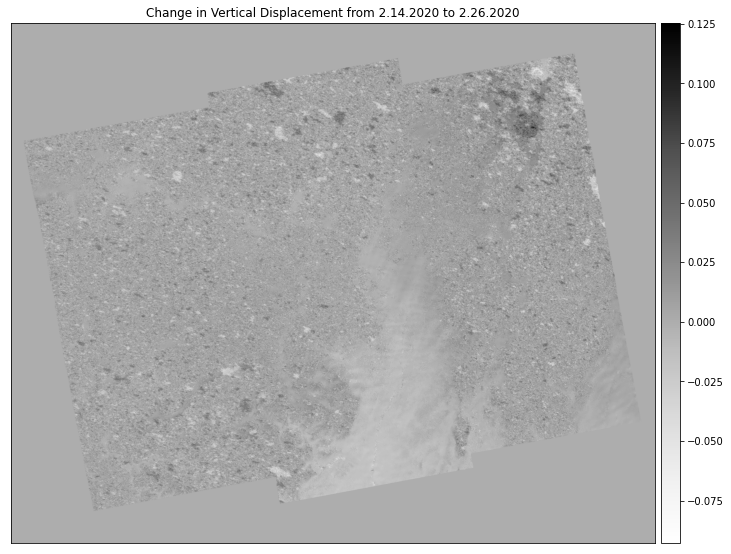

In [60]:
# open and plot vertical displacement map
with rio.open('S1AA_20200214T225132_20200226T225132_VVP012_INT80_G_ueF_1BFC/S1AA_20200214T225132_20200226T225132_VVP012_INT80_G_ueF_1BFC_vert_disp.tif') as vert_disp_src:
    feb262020 = vert_disp_src.read(1)

ep.plot_bands(feb262020,
              title="Change in Vertical Displacement from 2.14.2020 to 2.26.2020",
              cmap="Greys")

plt.show()

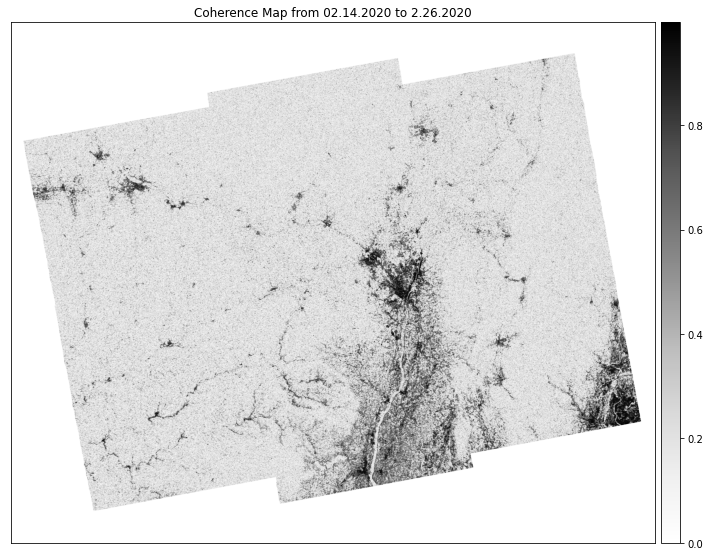

In [61]:
with rio.open('S1AA_20200214T225132_20200226T225132_VVP012_INT80_G_ueF_1BFC/S1AA_20200214T225132_20200226T225132_VVP012_INT80_G_ueF_1BFC_corr.tif') as coherence_src:
    feb262020_corr = coherence_src.read(1)

ep.plot_bands(feb262020_corr,
              title="Coherence Map from 02.14.2020 to 2.26.2020",
              cmap="Greys")

plt.show()

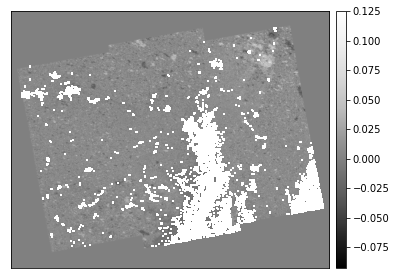

In [62]:
# masking the vertical displacement array (feb262020) by using coherence array (feb262020_corr) where condition coherence array >0.8 is true
feb262020_mask = np.ma.masked_where(feb262020_corr > 0.8, feb262020)
  
# plot vertical displacement array masked by coherence
fig, ax = plt.subplots(figsize=(6,6))
ep.plot_bands(feb262020_mask,
               ax=ax,
               scale=False)
plt.show()

In [63]:
#define online filepath (aka url)
#Feb26-Mar09
mar092020_url = 'https://d3gm2hf49xd6jj.cloudfront.net/129147e0-248e-4757-996d-b666209f22ef/S1AA_20200226T225132_20200309T225132_VVP012_INT80_G_ueF_5D02.zip'

#define local filepath
mar092020_filepath = 'S1AA_20200226T225132_20200309T225132_VVP012_INT80_G_ueF_5D02.zip'

#download data
urllib.request.urlretrieve(mar092020_url, mar092020_filepath)

#unzip file 
!unzip S1AA_20200226T225132_20200309T225132_VVP012_INT80_G_ueF_5D02.zip

Archive:  S1AA_20200226T225132_20200309T225132_VVP012_INT80_G_ueF_5D02.zip
   creating: S1AA_20200226T225132_20200309T225132_VVP012_INT80_G_ueF_5D02/
  inflating: S1AA_20200226T225132_20200309T225132_VVP012_INT80_G_ueF_5D02/S1AA_20200226T225132_20200309T225132_VVP012_INT80_G_ueF_5D02_color_phase.png  
  inflating: S1AA_20200226T225132_20200309T225132_VVP012_INT80_G_ueF_5D02/S1AA_20200226T225132_20200309T225132_VVP012_INT80_G_ueF_5D02_unw_phase.png  
  inflating: S1AA_20200226T225132_20200309T225132_VVP012_INT80_G_ueF_5D02/S1AA_20200226T225132_20200309T225132_VVP012_INT80_G_ueF_5D02_amp.tif  
  inflating: S1AA_20200226T225132_20200309T225132_VVP012_INT80_G_ueF_5D02/S1AA_20200226T225132_20200309T225132_VVP012_INT80_G_ueF_5D02_water_mask.tif.xml  
  inflating: S1AA_20200226T225132_20200309T225132_VVP012_INT80_G_ueF_5D02/S1AA_20200226T225132_20200309T225132_VVP012_INT80_G_ueF_5D02_wrapped_phase.tif  
  inflating: S1AA_20200226T225132_20200309T225132_VVP012_INT80_G_ueF_5D02/S1AA_20200226T22

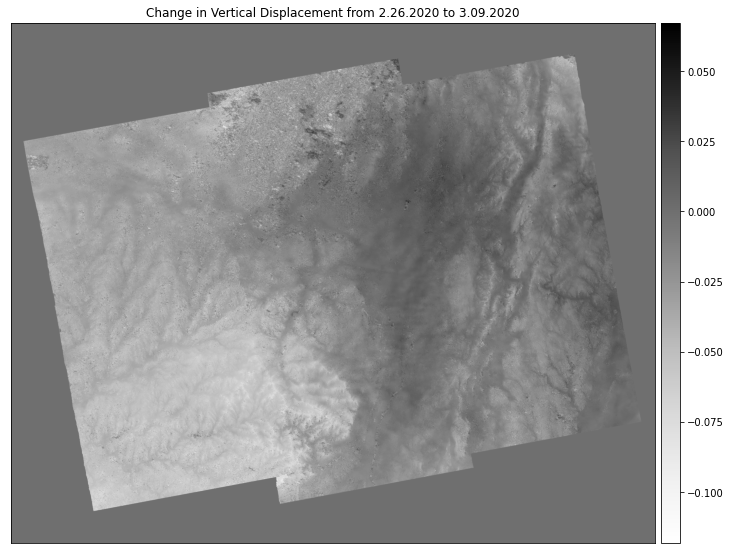

In [64]:
# open and plot vertical displacement map
with rio.open('S1AA_20200226T225132_20200309T225132_VVP012_INT80_G_ueF_5D02/S1AA_20200226T225132_20200309T225132_VVP012_INT80_G_ueF_5D02_vert_disp.tif') as vert_disp_src:
    mar092020 = vert_disp_src.read(1)

ep.plot_bands(mar092020,
              title="Change in Vertical Displacement from 2.26.2020 to 3.09.2020",
              cmap="Greys")

plt.show()

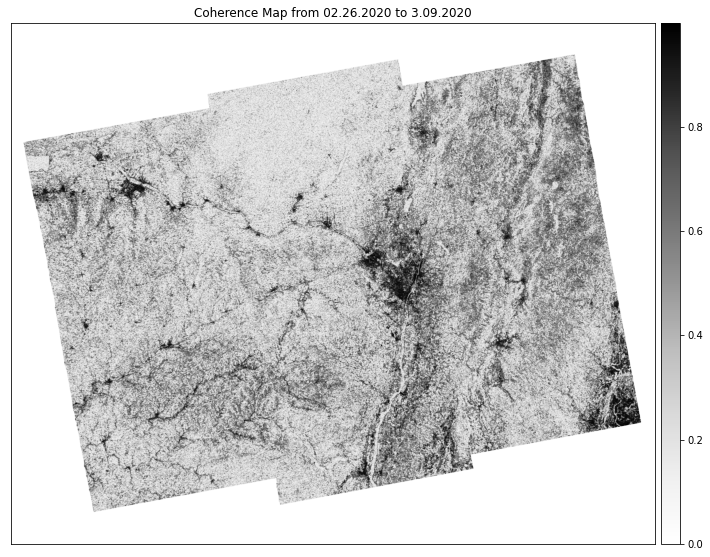

In [65]:
with rio.open('S1AA_20200226T225132_20200309T225132_VVP012_INT80_G_ueF_5D02/S1AA_20200226T225132_20200309T225132_VVP012_INT80_G_ueF_5D02_corr.tif') as coherence_src:
    mar092020_corr = coherence_src.read(1)

ep.plot_bands(mar092020_corr,
              title="Coherence Map from 02.26.2020 to 3.09.2020",
              cmap="Greys")

plt.show()

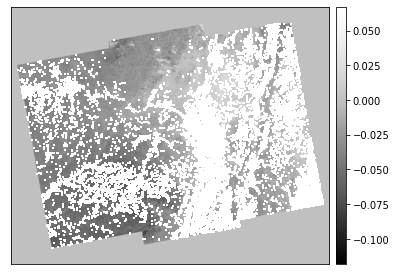

In [66]:
# masking the vertical displacement array (mar092020) by using coherence array (mar092020_corr) where condition coherence array >0.8 is true
mar092020_mask = np.ma.masked_where(mar092020_corr > 0.8, mar092020)
  
# plot vertical displacement array masked by coherence
fig, ax = plt.subplots(figsize=(6,6))
ep.plot_bands(mar092020_mask,
               ax=ax,
               scale=False)
plt.show()

In [67]:
#define online filepath (aka url)
#Mar09-Mar21
mar212020_url = 'https://d3gm2hf49xd6jj.cloudfront.net/0d6c13f0-4eb8-44c8-b4a7-a73b906685d7/S1AA_20200309T225132_20200321T225133_VVP012_INT80_G_ueF_F1D7.zip'

#define local filepath
mar212020_filepath = 'S1AA_20200309T225132_20200321T225133_VVP012_INT80_G_ueF_F1D7.zip'

#download data
urllib.request.urlretrieve(mar212020_url, mar212020_filepath)

#unzip file 
!unzip S1AA_20200309T225132_20200321T225133_VVP012_INT80_G_ueF_F1D7.zip


Archive:  S1AA_20200309T225132_20200321T225133_VVP012_INT80_G_ueF_F1D7.zip
   creating: S1AA_20200309T225132_20200321T225133_VVP012_INT80_G_ueF_F1D7/
  inflating: S1AA_20200309T225132_20200321T225133_VVP012_INT80_G_ueF_F1D7/S1AA_20200309T225132_20200321T225133_VVP012_INT80_G_ueF_F1D7_water_mask.tif.xml  
  inflating: S1AA_20200309T225132_20200321T225133_VVP012_INT80_G_ueF_F1D7/S1AA_20200309T225132_20200321T225133_VVP012_INT80_G_ueF_F1D7_corr.tif.xml  
  inflating: S1AA_20200309T225132_20200321T225133_VVP012_INT80_G_ueF_F1D7/S1AA_20200309T225132_20200321T225133_VVP012_INT80_G_ueF_F1D7_los_disp.tif.xml  
  inflating: S1AA_20200309T225132_20200321T225133_VVP012_INT80_G_ueF_F1D7/S1AA_20200309T225132_20200321T225133_VVP012_INT80_G_ueF_F1D7_amp.tif  
  inflating: S1AA_20200309T225132_20200321T225133_VVP012_INT80_G_ueF_F1D7/S1AA_20200309T225132_20200321T225133_VVP012_INT80_G_ueF_F1D7_water_mask.tif  
  inflating: S1AA_20200309T225132_20200321T225133_VVP012_INT80_G_ueF_F1D7/S1AA_20200309T22513

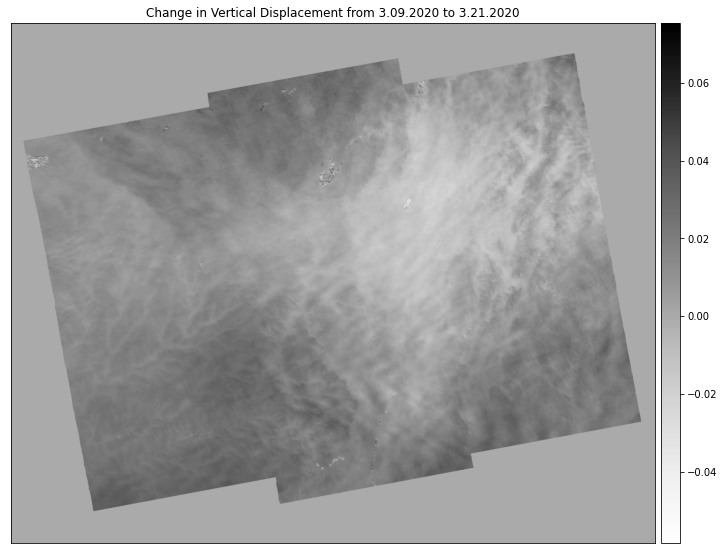

In [68]:
# open and plot vertical displacement map
with rio.open('S1AA_20200309T225132_20200321T225133_VVP012_INT80_G_ueF_F1D7/S1AA_20200309T225132_20200321T225133_VVP012_INT80_G_ueF_F1D7_vert_disp.tif') as vert_disp_src:
    mar212020 = vert_disp_src.read(1)

ep.plot_bands(mar212020,
              title="Change in Vertical Displacement from 3.09.2020 to 3.21.2020",
              cmap="Greys")

plt.show()

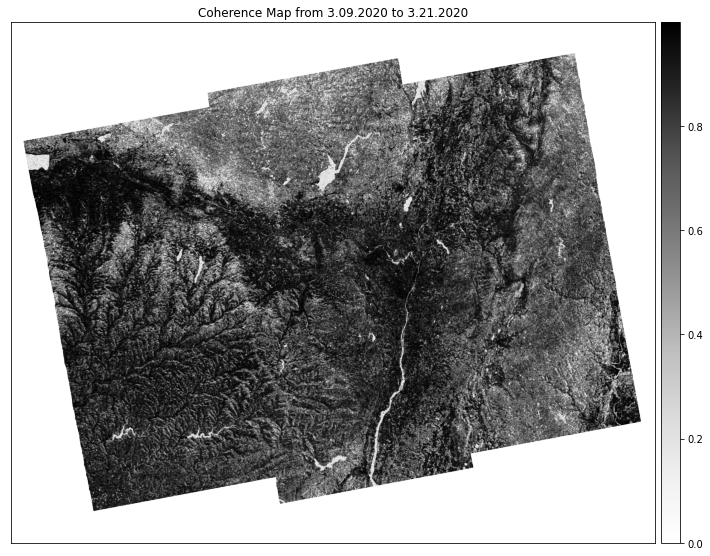

In [69]:
with rio.open('S1AA_20200309T225132_20200321T225133_VVP012_INT80_G_ueF_F1D7/S1AA_20200309T225132_20200321T225133_VVP012_INT80_G_ueF_F1D7_corr.tif') as coherence_src:
    mar212020_corr = coherence_src.read(1)

ep.plot_bands(mar212020_corr,
              title="Coherence Map from 3.09.2020 to 3.21.2020",
              cmap="Greys")

plt.show()

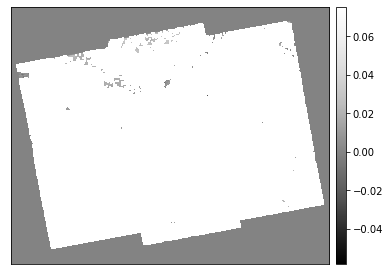

In [73]:
# masking the vertical displacement array (mar212020) by using coherence array (mar212020_corr) where condition coherence array >0.8 is true
mar212020_mask = np.ma.masked_where(mar212020_corr > 0.8, mar212020)
  
# plot vertical displacement array masked by coherence
fig, ax = plt.subplots(figsize=(6,6))
ep.plot_bands(mar212020_mask,
               ax=ax,
               scale=False)
plt.show()